<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [105]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7ae54f93cf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae5488074d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae54eddf9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae54f93c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae54f93d050>],
 'means': []}

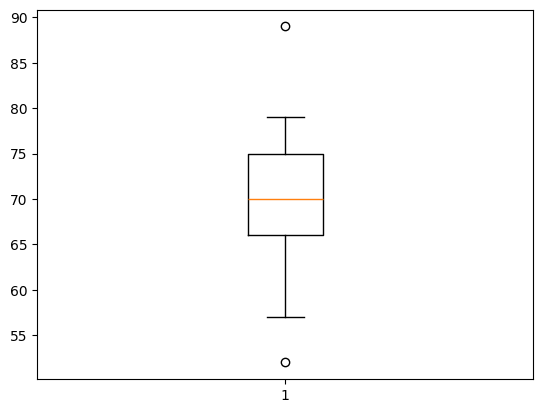

In [106]:
IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






#1.

In [107]:
df = pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#2.

In [109]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [110]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Eliminemos esos valores nulos.

In [111]:
df = df.dropna(axis=0).copy()
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


Como vemos, ya no hay valores nulos.

#3.

Elementos unicos en la columna ocean proximity

In [112]:
unico_ocean_prox = df['ocean_proximity'].unique()
unico_ocean_prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#4.
Sacar la media usando groupby para las columnas requeridas.

Agrupeme por elemento unico de ocean proximity

In [113]:
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]

#Agrupación
df.groupby(["ocean_proximity"])[cols].mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


#5.

Construye un histograma para cada columna, puede emplear la libreria de seaborn.

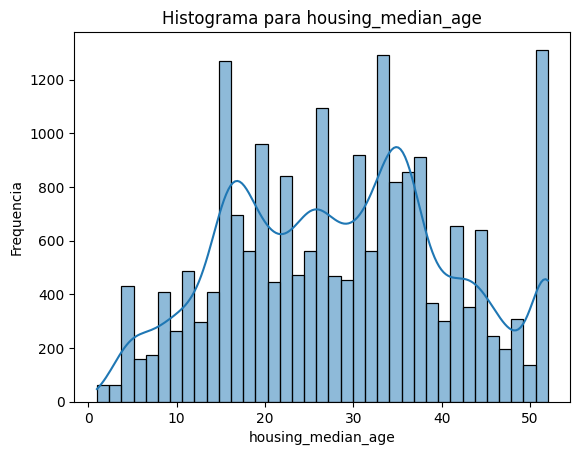

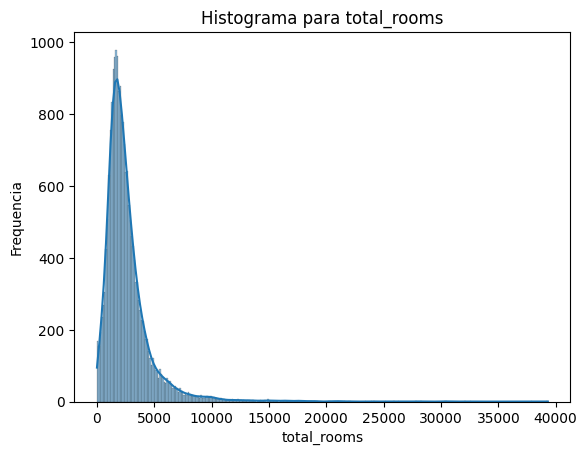

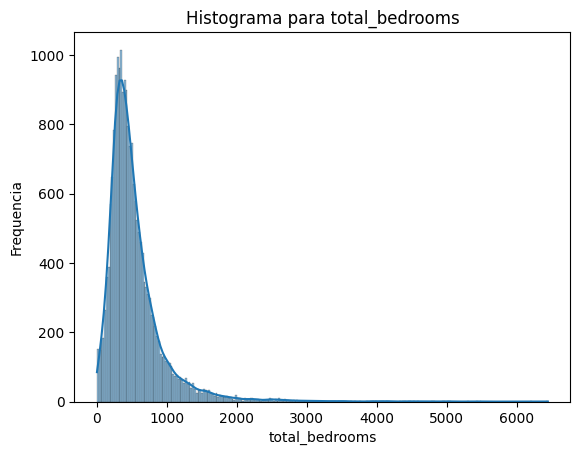

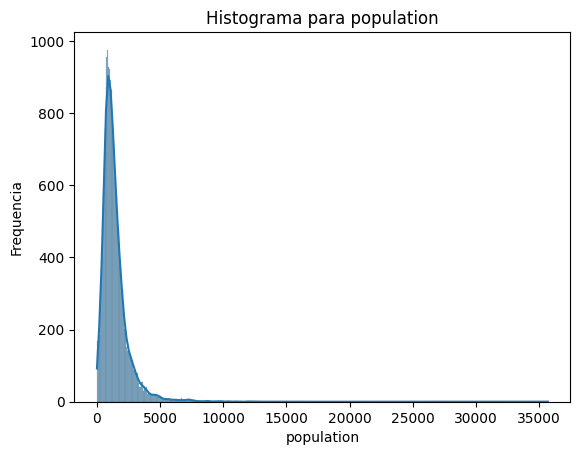

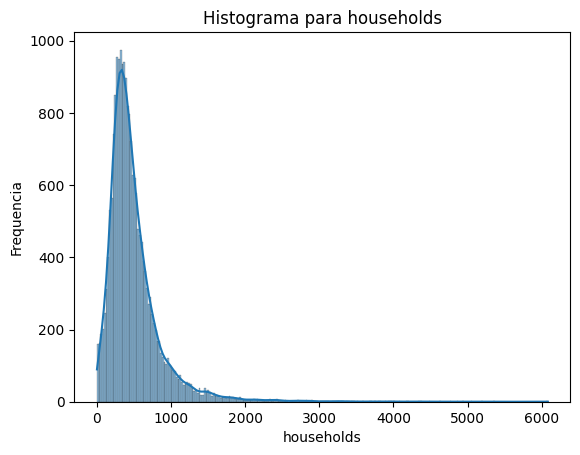

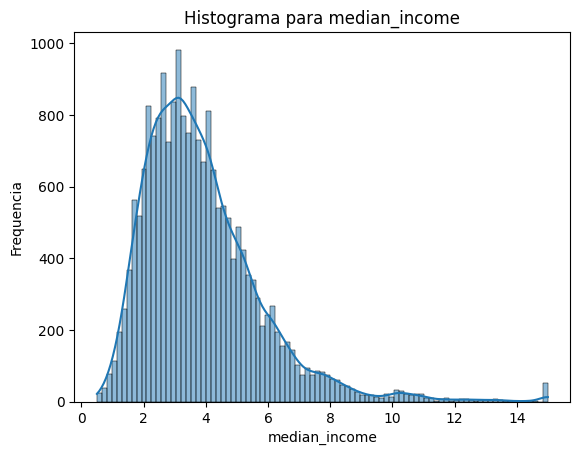

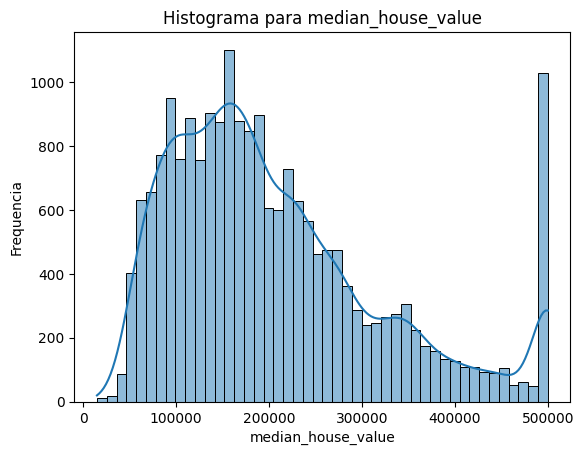

In [114]:
#Histograma
for col in cols:
  sns.histplot(df[col], kde=True)
  plt.title(f'Histograma para {col}')
  plt.xlabel(col)
  plt.ylabel('Frequencia')
  plt.show()

#6.
### Eliminación de los outliers.

In [115]:
def filter_outliers_in_selected_columns(df, cols):
    df_clean = pd.DataFrame()
    for group_name, group_df in df.groupby('ocean_proximity'):
        condition = pd.Series(True, index=group_df.index)
        for col in cols:
            Q1 = group_df[col].quantile(0.25)
            Q3 = group_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            condition = condition & (group_df[col] >= lower_bound) & (group_df[col] <= upper_bound)

        group_df_filtered = group_df[condition]
        df_clean = pd.concat([df_clean, group_df_filtered], ignore_index=True)
    return df_clean

#Evaluacion
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]
df = filter_outliers_in_selected_columns(df, cols)

#7.
Construir un boxplot.

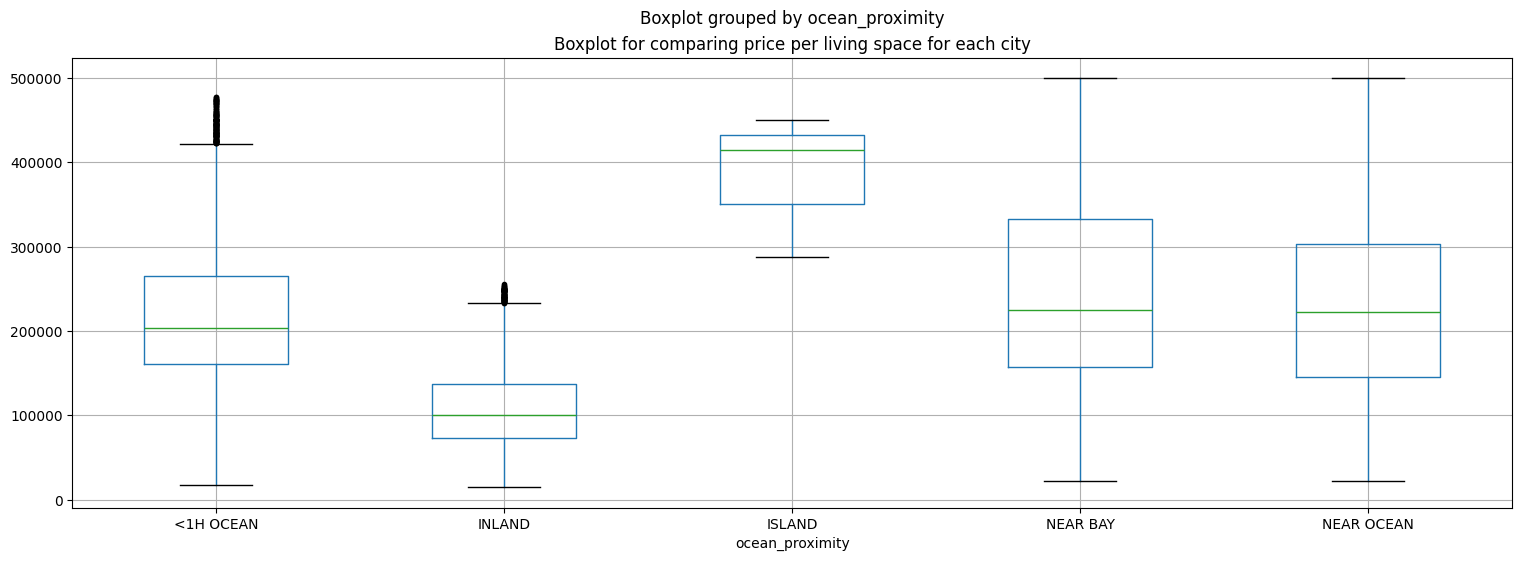

In [116]:
#Gráfica
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

#8.

Hallar la matriz de correlación.

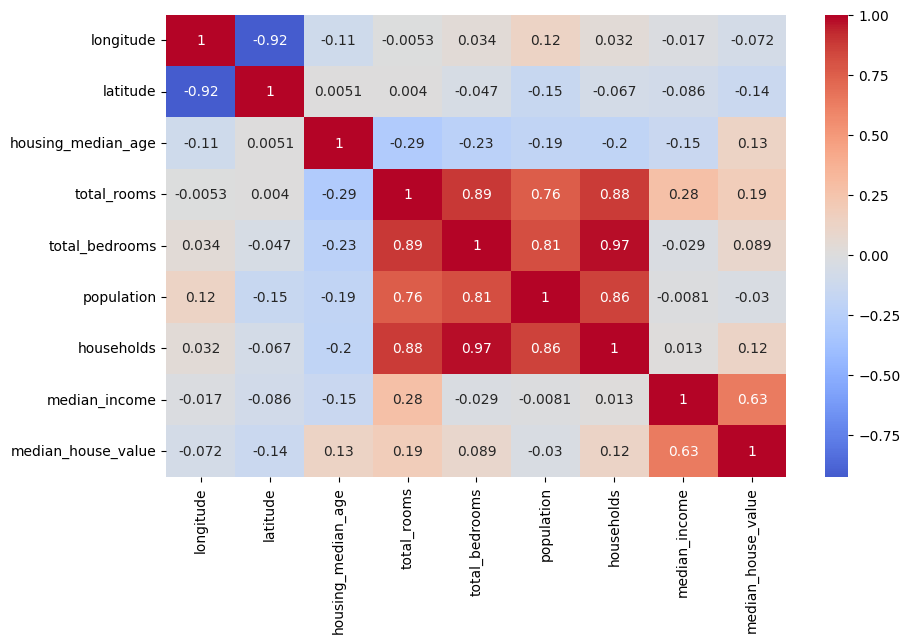

In [117]:
# Hallar la matriz de correlación.
df_numeric = df.select_dtypes(include=np.number)

corr_matrix = df_numeric.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

#9.

Con las columnas, realiza un grafico pairplot empleando seaborn  de python.


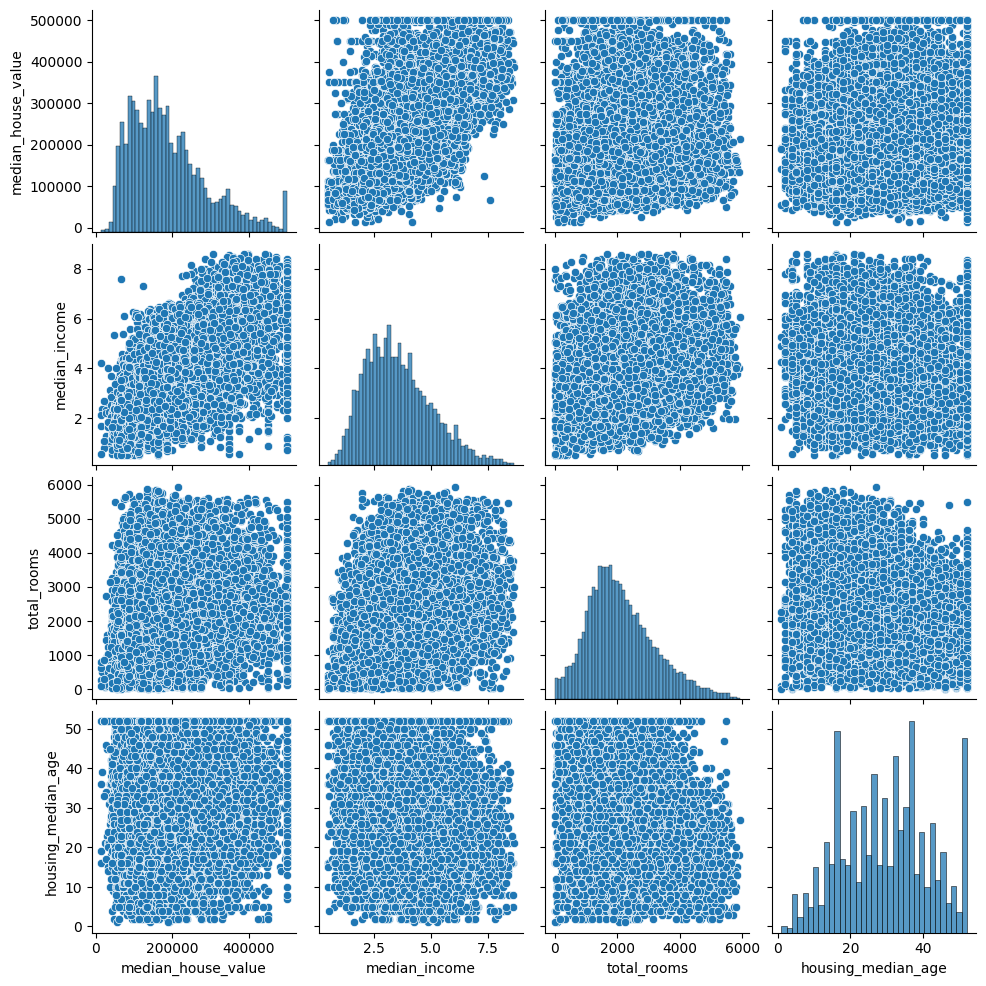

In [118]:
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
sns.pairplot(df[cols])
plt.show()

#10.

Realiza un scatter plot con la libreria seaborn de python, el color del grafico puede ser empleado con la columna median_house_value.

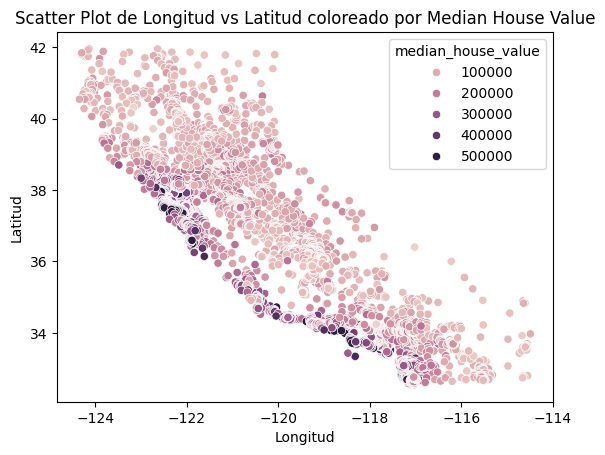

In [119]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='median_house_value')
plt.title('Scatter Plot de Longitud vs Latitud coloreado por Median House Value')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

Vemos que en la zona costera es mucho más cara.
Esto es como un mapa de California.

#11.
## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.

## 11.

¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

Acá estamos eligiendo muestras aleatorias.

In [120]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

13995
3499


In [121]:
len(df)

17494

En este caso estamos tomando aproximadamente un 80% de los datos para train y un 20% de los datos para test.
En principio esto estaría bien, sin embargo, el sesgo que pueda tener esta elección de los datos va a depender más de la variabilidad de los mismos.

Esto quizás induce un sesgo grande en cuanto a que estamos tomando una muestra aleatoria no estratificada. Ya que no puedo garantizar que existan las mismas proporciones en los datos originales.
(similar al ejemplo de los votantes de clase).


#12.

División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser la que probaremos a continuación.

<Axes: >

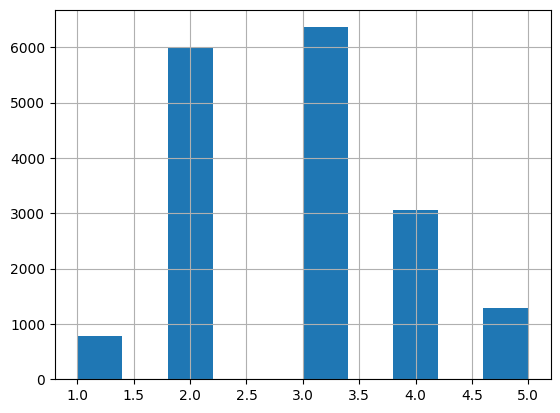

In [122]:
#Haciendo una mejor división de los datos

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [123]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [124]:
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.365702
2,0.340693
4,0.175706
5,0.073598
1,0.044302


In [125]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.044244,0.044298,0.045442,2.707307,0.123476
2,0.343032,0.342955,0.362675,5.726334,0.022379
3,0.363610,0.363532,0.350386,3.637013,0.021436
4,0.175146,0.175193,0.168905,3.562954,0.026919
5,0.073968,0.074021,0.072592,1.860324,0.071559


#13.
Limpieza de los datos.

Solución.

In [126]:
#Agregar nuevas variables

train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]

In [127]:
#Filtrar datos

df.isnull().sum()


# df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
# df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = train_set["total_bedrooms"].median()
q=train_set["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


In [128]:
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19622451e+02,  3.56931383e+01,  2.96085030e+01,  2.15417135e+03,
        4.48302608e+02,  1.19992040e+03,  4.19193998e+02,  3.60080354e+00,
        1.91393918e+05,  2.89932119e+00,  5.30337250e+00,  2.15660794e-01,
        2.94844170e+00])

#14.
Compara las siguientes variables:

In [129]:
x = imp_mean.statistics_
df_train_num_numeric = df_train_num.drop("income_cat", axis=1)
print(df_train_num_numeric.median())

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num_numeric) # Ajusto solo las columnas numéricas

# Transformo los datos de entrenamiento
X_train_imputed = imp_mean.transform(df_train_num_numeric)
housing_tr = pd.DataFrame(X_train_imputed, columns=df_train_num_numeric.columns)

#Correcciones
df_train_num = train_set.drop(["ocean_proximity", "income_cat"], axis=1)

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num) # Columnas numéricas

#Comparación y transformación
print(imp_mean.statistics_)
print(df_train_num.median())

#Transformación de los datos de entrenamiento
X_train_imputed = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X_train_imputed, columns=df_train_num.columns)

longitude                     -118.610000
latitude                        34.350000
housing_median_age              30.000000
total_rooms                   1995.000000
total_bedrooms                 415.000000
population                    1117.000000
households                     390.000000
median_income                    3.406300
median_house_value          171300.000000
rooms_per_household              5.156250
bedrooms_per_room                0.205721
population_per_household         2.828025
dtype: float64
[-1.19622451e+02  3.56931383e+01  2.96085030e+01  2.15417135e+03
  4.48302608e+02  1.19992040e+03  4.19193998e+02  3.60080354e+00
  1.91393918e+05  5.30337250e+00  2.15660794e-01  2.94844170e+00]
longitude                     -118.610000
latitude                        34.350000
housing_median_age              30.000000
total_rooms                   1995.000000
total_bedrooms                 415.000000
population                    1117.000000
households                     39

#15.
Manejo de texto y atributos categóricos.

Explicar el codigo.

In [130]:
from sklearn.preprocessing import OneHotEncoder

train_set["ocean_proximity"].unique()
housing_cat=train_set[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Este código toma una columna de los datos categóricos de train_set, en este caso 'OCEAN PROXIMITY' y la convierte en variables dummy o "one-hot", lo que significa que crea una nueva columna para cada categoría posible y coloca un 1 donde la categoría está presente y 0 en los demás casos (como una especie de matriz booleana de unos y ceros).

#16.

Escalamiento de variables.

In [131]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)

housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

#17.
Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.



In [138]:
# 1. Estratificación y división
housing = df.copy()
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

#1.5 Definir los datos de entrenamiento y de testeo
for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx].drop("income_cat", axis=1)
    strat_test_set = housing.loc[test_idx].drop("income_cat", axis=1)

# 2. Separar numéricas y categóricas
housing_train_num = strat_train_set.drop("ocean_proximity", axis=1)
housing_test_num = strat_test_set.drop("ocean_proximity", axis=1)

# 3. Quitar valores faltantes
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_train_num)
housing_train_num_imputed = pd.DataFrame(imputer.transform(housing_train_num),
                                        columns=housing_train_num.columns,
                                        index=housing_train_num.index)
housing_test_num_imputed = pd.DataFrame(imputer.transform(housing_test_num),
                                       columns=housing_test_num.columns,
                                       index=housing_test_num.index)

# 4. Crear variables derivadas
for dataset in [housing_train_num_imputed, housing_test_num_imputed]:
    dataset["rooms_per_household"] = dataset["total_rooms"] / dataset["households"]
    dataset["bedrooms_per_room"] = dataset["total_bedrooms"] / dataset["total_rooms"]
    dataset["population_per_household"] = dataset["population"] / dataset["households"]

# 5. Escalamiento
scaler = StandardScaler()
housing_train_scaled = pd.DataFrame(scaler.fit_transform(housing_train_num_imputed),
                                   columns=housing_train_num_imputed.columns,
                                   index=housing_train_num_imputed.index)
housing_test_scaled = pd.DataFrame(scaler.transform(housing_test_num_imputed),
                                  columns=housing_test_num_imputed.columns,
                                  index=housing_test_num_imputed.index)

# 6. Codificar variable categórica
housing_train_cat = pd.get_dummies(strat_train_set[["ocean_proximity"]], drop_first=True)
housing_test_cat = pd.get_dummies(strat_test_set[["ocean_proximity"]], drop_first=True)

# Alinear columnas (por si acaso alguna categoría falta en test)
housing_test_cat = housing_test_cat.reindex(columns=housing_train_cat.columns, fill_value=0)

# 7. Unir numéricas y categóricas
housing_train_final = pd.concat([housing_train_scaled, housing_train_cat], axis=1)
housing_test_final = pd.concat([housing_test_scaled, housing_test_cat], axis=1)

# 8. Agregar variable objetivo (etiqueta)
housing_train_final["median_house_value"] = strat_train_set["median_house_value"]
housing_test_final["median_house_value"] = strat_test_set["median_house_value"]

housing_test_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
4619,0.870611,-0.829945,-0.700737,0.949703,-0.004809,0.354539,0.243262,2.200868,280300.0,0.636654,-1.357712,0.065768,False,0,False,False
4755,0.970160,-1.033507,-0.945822,-0.436332,-0.799421,-0.688544,-0.788409,1.230410,300000.0,0.528904,-0.981051,0.091483,False,0,False,False
13372,-1.299565,0.969731,0.851466,-1.127504,-1.124489,-1.049421,-1.143655,-1.538887,113300.0,-0.109852,-0.032841,0.108804,False,0,True,False
15746,1.243921,-1.361983,-1.190906,0.479078,1.245801,0.987310,1.104610,-0.987109,106700.0,-0.507118,0.996678,-0.151916,False,0,False,True
9197,-1.523551,1.520275,-0.210568,0.136722,0.270596,-1.112039,-0.803008,-0.956911,109700.0,1.618337,0.091447,-0.820933,True,0,False,False


#18 y 19.
Modelo lineal
¿que puede concluir respecto al modelo empleado?
¿El modelo de regresión lineal es valido para lo construido?

In [142]:
#Proposición de un modelo lineal
model = LinearRegression()
model.fit(housing_train_final.drop("median_house_value", axis=1), housing_train_final["median_house_value"])

#Evaluar el modelo
housing_test_X = housing_test_final.drop("median_house_value", axis=1)
housing_test_y = housing_test_final["median_house_value"]
housing_predictions = model.predict(housing_test_X)

#Calular R2 y RMSE
mse = mean_squared_error(housing_test_y, housing_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(housing_test_y, housing_predictions)

print("RMSE:", rmse)
print("R²:", r2)

RMSE: 58093.37258494921
R²: 0.6592679328513582


Como vemos, el modelo lineal implementado no es muy bueno. Del RMSE vemos que las predicciones se desvían en rangos muy altos lo que induce fuertemente a un error dado que estamos comparando por ejemplo, precios de viviendas.
Por otro lado, vemos del $R^2$ que el modelo explica el 66% de la variabilidad de los precios de las viviendas lo que sugiere que capta bien la relación entre las variables predictoras y la variable objetivo, sin embargo de igual forma hay 34% que no logra captar muy bien.

Esto nos permite concluir que aunque si bien el modelo lineal es útil para entender tendencias generales y relaciones lineales, la precisión no es óptima para predicciones puntuales.

Pienso que no es un modelo muy válido dado que lo que se busca es abarcar más cosas.

#20 y 21

¿qué informacion nos da el score?
¿Puede ser ajustado a otro modelo?

En regresión lineal, generalmente, el score es $R^2$, el cual nos habla (como mencioné en el punto anterior) de qué proporción de la variabilidad en la variable objetivo es explicada por el modelo.
Un valor cercano a 1, indica precisamente que el modelo logró captar bien los patrones en los datos.
En este caso, obtuvimos un valor de 0.65, el cual en principio nos habla de que pudo captar parte importante de los patrones presentes en los datos, aunque todavía existe una porción considerable que no fue explicada, lo que sugiere un margen de mejora.

Se podría pensar en usar diferentes modelos que lidien mejor con las relaciones no lineales que puedan tener estos datos como lo pueden ser regresiones polinómicas o métodos quizás, más sofisticados encontrados en la literatura como Random Forest, Gradient Boosting, Support Vector Regression, o redes neuronales.


#22.
¿Como puede autmatizar todo el proceso empleando pipelines?

Existe una herramienta de la librería sklearn llamada Pipeline, la cual básicamente nos permite automatizar todo el proceso de preparar los datos (como limpiar, transformar, escalar, codificar) y entrenar el modelo.

In [145]:
#Breve ejemplo - usando ayuda

# X (features) y y (target) para entrenamiento
X_train = housing_train_final.drop("median_house_value", axis=1)
y_train = housing_train_final["median_house_value"]

# X (features) y y (target) para test
X_test = housing_test_final.drop("median_house_value", axis=1)
y_test = housing_test_final["median_house_value"]


In [146]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Crear pipeline solo con el modelo
modelo_lineal = Pipeline([
    ("modelo", LinearRegression())
])

# Entrenar el modelo
modelo_lineal.fit(X_train, y_train)

# Predecir
y_pred = modelo_lineal.predict(X_test)

# Evaluar
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 58093.37258494921
R²: 0.6592679328513582


No hay una mejora del error, porque de igual manera estamos trabajando con los mismos datos. Para ello deberíamos partir desde más atrás.